In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
price = pd.read_csv('data.csv')
price= price.drop(['date' , 'view' , 'sqft_above' , 'sqft_basement' , 'street' , 'statezip'], axis=1)
price['bathrooms'] = price['bathrooms'].astype(int)
price['floors'] = price['floors'].astype(int)
price['price'] = price['price'].astype(float)


In [3]:
price

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,yr_renovated,city,country
0,3.130000e+05,3.0,1,1340,7912,1,0,3,1955,2005,Shoreline,USA
1,2.384000e+06,5.0,2,3650,9050,2,0,5,1921,0,Seattle,USA
2,3.420000e+05,3.0,2,1930,11947,1,0,4,1966,0,Kent,USA
3,4.200000e+05,3.0,2,2000,8030,1,0,4,1963,0,Bellevue,USA
4,5.500000e+05,4.0,2,1940,10500,1,0,4,1976,1992,Redmond,USA
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1,1510,6360,1,0,4,1954,1979,Seattle,USA
4596,5.343333e+05,3.0,2,1460,7573,2,0,3,1983,2009,Bellevue,USA
4597,4.169042e+05,3.0,2,3010,7014,2,0,3,2009,0,Renton,USA
4598,2.034000e+05,4.0,2,2090,6630,1,0,3,1974,0,Seattle,USA


In [4]:
price.shape

(4600, 12)

In [6]:
price.info

<bound method DataFrame.info of              price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     3.130000e+05       3.0          1         1340      7912       1   
1     2.384000e+06       5.0          2         3650      9050       2   
2     3.420000e+05       3.0          2         1930     11947       1   
3     4.200000e+05       3.0          2         2000      8030       1   
4     5.500000e+05       4.0          2         1940     10500       1   
...            ...       ...        ...          ...       ...     ...   
4595  3.081667e+05       3.0          1         1510      6360       1   
4596  5.343333e+05       3.0          2         1460      7573       2   
4597  4.169042e+05       3.0          2         3010      7014       2   
4598  2.034000e+05       4.0          2         2090      6630       1   
4599  2.206000e+05       3.0          2         1490      8102       2   

      waterfront  condition  yr_built  yr_renovated       city country  
0     

In [9]:
price

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,yr_renovated,city,country
0,3.130000e+05,3.0,1,1340,7912,1,0,3,1955,2005,Shoreline,USA
1,2.384000e+06,5.0,2,3650,9050,2,0,5,1921,0,Seattle,USA
2,3.420000e+05,3.0,2,1930,11947,1,0,4,1966,0,Kent,USA
3,4.200000e+05,3.0,2,2000,8030,1,0,4,1963,0,Bellevue,USA
4,5.500000e+05,4.0,2,1940,10500,1,0,4,1976,1992,Redmond,USA
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1,1510,6360,1,0,4,1954,1979,Seattle,USA
4596,5.343333e+05,3.0,2,1460,7573,2,0,3,1983,2009,Bellevue,USA
4597,4.169042e+05,3.0,2,3010,7014,2,0,3,2009,0,Renton,USA
4598,2.034000e+05,4.0,2,2090,6630,1,0,3,1974,0,Seattle,USA


In [11]:
print(price.isnull().sum())

price           0
bedrooms        0
bathrooms       0
sqft_living     0
sqft_lot        0
floors          0
waterfront      0
condition       0
yr_built        0
yr_renovated    0
city            0
country         0
dtype: int64


In [12]:
print(price.notnull().sum())

price           4600
bedrooms        4600
bathrooms       4600
sqft_living     4600
sqft_lot        4600
floors          4600
waterfront      4600
condition       4600
yr_built        4600
yr_renovated    4600
city            4600
country         4600
dtype: int64


In [13]:
price.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,1.788913,2139.346957,1.485252e+04,1.459130,0.007174,3.451739,1970.786304,808.608261
std,5.638347e+05,0.908848,0.752185,963.206916,3.588444e+04,0.552194,0.084404,0.677230,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,1.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.000000,1460.000000,5.000750e+03,1.000000,0.000000,3.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.000000,1980.000000,7.683000e+03,1.000000,0.000000,3.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.000000,2620.000000,1.100125e+04,2.000000,0.000000,4.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.000000,1.000000,5.000000,2014.000000,2014.000000


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

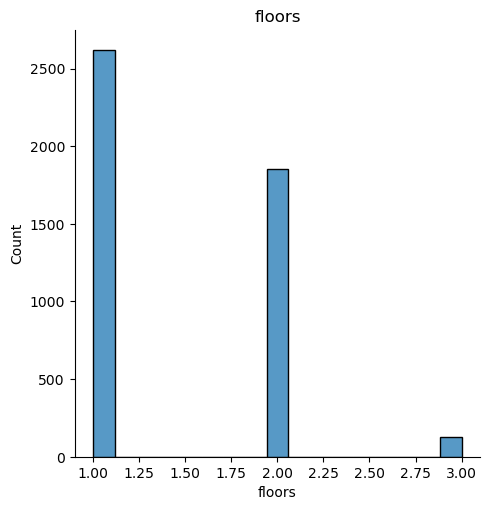

In [14]:
plt.figure(figsize=(6,6))
sns.displot(price['floors'])
plt.title('floors')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

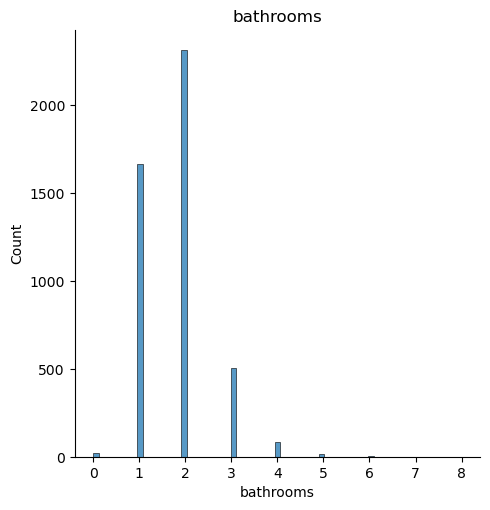

In [15]:
plt.figure(figsize=(6,6))
sns.displot(price['bathrooms'])
plt.title('bathrooms')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

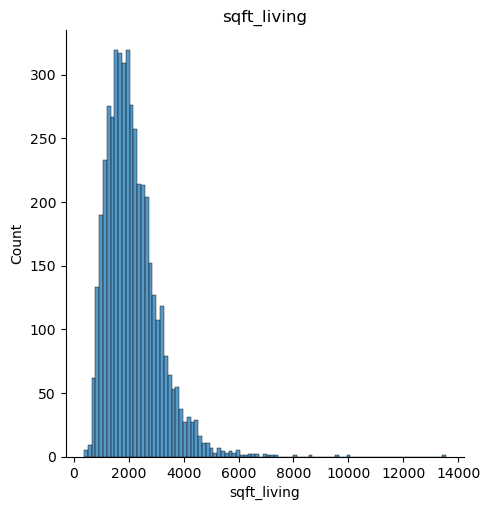

In [16]:
plt.figure(figsize=(6,6))
sns.displot(price['sqft_living'])
plt.title('sqft_living')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

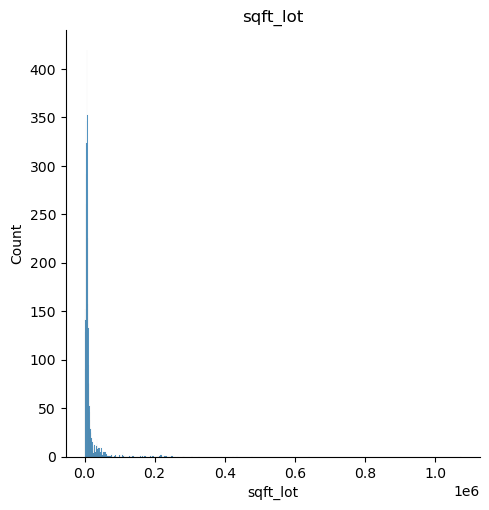

In [17]:
plt.figure(figsize=(6,6))
sns.displot(price['sqft_lot'])
plt.title('sqft_lot')
plt.show()

In [18]:
price['waterfront'].value_counts()

waterfront
0    4567
1      33
Name: count, dtype: int64

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

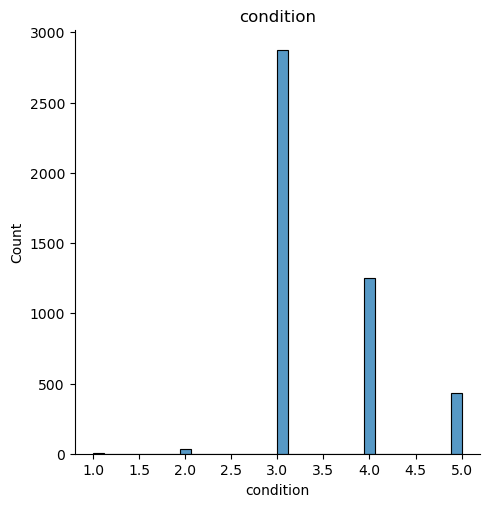

In [19]:
plt.figure(figsize=(6,6))
sns.displot(price['condition'])
plt.title('condition')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

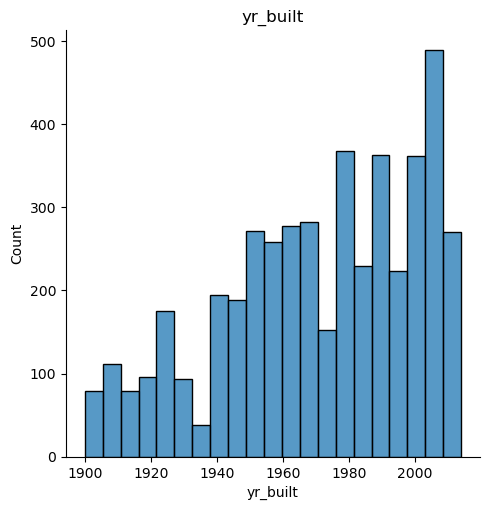

In [21]:
plt.figure(figsize=(6,6))
sns.displot(price['yr_built'])
plt.title('yr_built')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

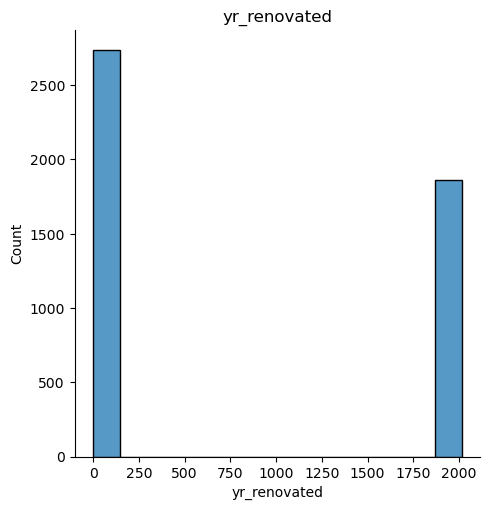

In [22]:
plt.figure(figsize=(6,6))
sns.displot(price['yr_renovated'])
plt.title('yr_renovated')
plt.show()

In [23]:
price['country'].value_counts()

country
USA    4600
Name: count, dtype: int64

In [24]:
price['city'].value_counts()

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific        

In [25]:
X = price.drop(columns='price' , axis=1).values
y = price['price'].values

In [27]:
X

array([[3.0, 1, 1340, ..., 2005, 'Shoreline', 'USA'],
       [5.0, 2, 3650, ..., 0, 'Seattle', 'USA'],
       [3.0, 2, 1930, ..., 0, 'Kent', 'USA'],
       ...,
       [3.0, 2, 3010, ..., 0, 'Renton', 'USA'],
       [4.0, 2, 2090, ..., 0, 'Seattle', 'USA'],
       [3.0, 2, 1490, ..., 0, 'Covington', 'USA']], dtype=object)

In [28]:
y

array([ 313000.      , 2384000.      ,  342000.      , ...,
        416904.166667,  203400.      ,  220600.      ])

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan , strategy = 'mean')
imputer.fit(X[: , 0:9])
X[: , 0:9] = imputer.transform(X[: , 0:9])
print(X.shape)

(4600, 11)


In [30]:
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named 'df' and 'column_to_encode' is the categorical column
label_encoder = LabelEncoder()
price['city'] = label_encoder.fit_transform(price['city'])
price['country'] = label_encoder.fit_transform(price['country'])




In [31]:
price

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,yr_renovated,city,country
0,3.130000e+05,3.0,1,1340,7912,1,0,3,1955,2005,36,0
1,2.384000e+06,5.0,2,3650,9050,2,0,5,1921,0,35,0
2,3.420000e+05,3.0,2,1930,11947,1,0,4,1966,0,18,0
3,4.200000e+05,3.0,2,2000,8030,1,0,4,1963,0,3,0
4,5.500000e+05,4.0,2,1940,10500,1,0,4,1976,1992,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1,1510,6360,1,0,4,1954,1979,35,0
4596,5.343333e+05,3.0,2,1460,7573,2,0,3,1983,2009,3,0
4597,4.169042e+05,3.0,2,3010,7014,2,0,3,2009,0,32,0
4598,2.034000e+05,4.0,2,2090,6630,1,0,3,1974,0,35,0


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
kf = KFold(n_splits = 5 , random_state = 44 , shuffle = True)
print(X_train.shape)
print(X_test.shape)
print(X.shape)

(3680, 11)
(920, 11)
(4600, 11)


In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_train2 = poly_reg.fit_transform(X_train)
X_test2 = poly_reg.fit_transform(X_test)

ValueError: could not convert string to float: 'Woodinville'